### Numpy basics

In [2]:
import numpy as np
import matplotlib.pyplot as plt

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [ ]:
m = np.arange(12).reshape((3,4))
print(m, '\n')
print('rows', np.mean(m, axis = 0), '\n') #la dimensione 0 si riferisce sempre alle righe
print('columns', np.mean(m, axis = 1), '\n') #mentre 1 alle colonne se siamo in 2D
print('overall', np.mean(m)) #se abbiamo x,y la zero è x e la y è 1

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [ ]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print("outer",'\n', np.outer(u,v), '\n')
print("list of comprehension", '\n', np.array([[x*y for y in v] for x in u]), '\n')
print("broadcasting", '\n', u[:, np.newaxis] * v) #rende compatibili i vettori per il prodotto vett.

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [6]:
a = np.random.random((10, 6)) #fa una matrice di valori uniformi tra 0 e 1
a[np.any(a < 0.1, axis=1)] = 0 #filtro per modificare
print(a)

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.86611998 0.72207803 0.31238615 0.82881237 0.97251896 0.59564935]
 [0.90936996 0.83140574 0.31863509 0.41709004 0.81601065 0.79536037]
 [0.86627188 0.43712309 0.21120571 0.78204987 0.88388036 0.42275048]
 [0.         0.         0.         0.         0.         0.        ]
 [0.66934504 0.68083074 0.37533568 0.51816898 0.20058619 0.24791856]
 [0.22513617 0.52366    0.20761377 0.81334821 0.71359042 0.55871662]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

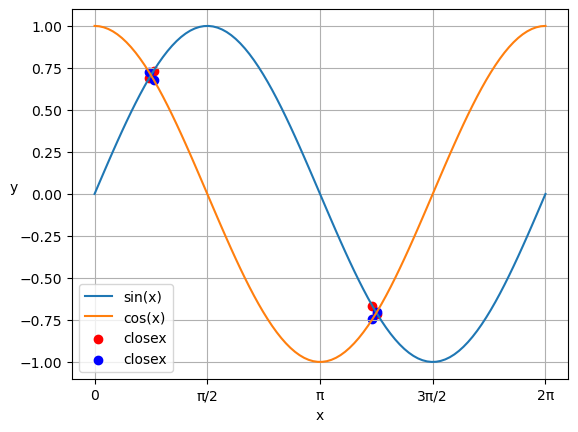

In [7]:
x = np.linspace(0,2*np.pi,100)
every10 = x[::10] #lascio le prime due posizioni invariate e prendo ogni 10 elementi
reversedx = x[::-1] #mettendo -1 alla fine cambio solo l'ordine dell'array
close = x[np.abs(np.sin(x) - np.cos(x)) < 0.1] #semplice da ricordare np.abs
x_ticks = np.arange(0, 2.5*np.pi, 0.5*np.pi) #creo la lista dei ticks delle x
x_tick_labels = ['0', 'π/2', 'π', '3π/2', '2π'] #i nomi dei ticks
plt.plot(x, np.sin(x), label='sin(x)') #asse x, asse y, label che finirà nella leggenda
plt.plot(x, np.cos(x), label='cos(x)')
plt.scatter(close, np.sin(close), label='closex', color='red')
plt.scatter(close, np.cos(close), label='closex', color='blue')
plt.xticks(x_ticks, x_tick_labels) #plotto xticks e i nomi sennò fa lui in automatico
plt.xlabel('x')
plt.ylabel('y', rotation='horizontal')
plt.legend()
plt.grid(True)
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [11]:
a = b = np.arange(1,11)
c = np.outer(a,b)
print("Matrix C",'\n', c, '\n')
print("trace", np.trace(c), '\n') #traccia che è la somma della diagonale
print("antidiagonal", np.fliplr(c).diagonal(), '\n') #prima flippa e poi prende la diagonale
print("offdiagonal", np.diag(c, k=1)) #prende la diagonale della matrice c spostata di 1 a destra

Matrix C 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

trace 385 

antidiagonal [10 18 24 28 30 30 28 24 18 10] 

offdiagonal [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [14]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]) #array delle distanze
grid_dist = np.abs(dist[:,np.newaxis]-dist) #newaxis aumenta la dimensione (in questo caso avevamo un
#array 1 riga 10 colonne, post newaxis abbiamo una matrice 10x10 dove le altre 9 righe sono identiche
#alla prima). Successivamente ci sottraiamo ad ogni riga l'array di partenza scalando ad ogni riga la
#colonna.
print("Grid of distances", '\n', grid_dist, '\n')
km = grid_dist * 1.60934
print("Grid of distances in km", '\n', km.astype(int)) #comando per mettere i valori int

Grid of distances 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

Grid of distances in km 
 [[   0  318  487 1184 1401 1890 2373 2484 3078 3939]
 [ 318    0  168  865 1083 1572 2055 2166 2760 3621]
 [ 487  168    0  696  914 1403 1886 1997 2591 3452]
 [1184  865  696    0  217  706 1189 1300 1894 2755]
 [1401 1083  914  217    0  489  972 1083 1676 2537]
 [1890 1572 1403  706  489    0  482  593 1187 2048]
 [2373 2055 1886 1189  972  482    0  111  704 1565]
 [2484 2166 1997 1300 1083  593  111    0  593 145

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [16]:
def primes(N):
    mask = np.ones((N+1,), dtype=bool) #creo un array booleano di uni con N+1 valori tutti True
    mask[0:2] = False  #0 e 1 non vengono contati come numeri primi

    for i in range(2, N+1):
        if mask[i]: #se il valore i nell'array è true (guarda che i sia un potenziale primo)
            mask[i*i:N+1:i] = False #inizia da i*i fino a N+1 a passi di i (solo multipli quindi)
    primes = np.nonzero(mask)[0] #prendo tutti i trues
    return primes
N = 99
primes99 = primes(N)
print(primes99)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[ 1 -1 -1 ...  1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]
 [-1  1  1 ...  1 -1 -1]
 ...
 [ 1  1 -1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ... -1  1 -1]] 

[[  1   0  -1 ... -42 -43 -44]
 [  1   0  -1 ...  10   9  10]
 [ -1   0   1 ... -10 -11 -12]
 ...
 [  1   2   1 ... -12 -11 -12]
 [ -1  -2  -3 ...  24  23  22]
 [  1   0  -1 ...  -6  -5  -6]] 

[  1.      1.968   2.952   3.992   4.864   5.56    6.448   7.428   8.176
   8.9     9.976  11.148  12.088  12.804  13.912  14.636  15.856  16.608
  17.32   18.184  18.832  20.096  20.952  22.084  22.824  24.156  24.992
  26.28   27.144  27.66   29.008  29.304  29.72   30.34   31.208  31.972
  33.448  34.548  35.512  36.392  37.344  38.428  39.664  41.088  42.448
  43.084  43.896  44.712  45.4    46.112  46.664  47.844  48.568  49.36
  50.448  51.644  52.424  52.692  53.544  53.812  55.136  54.828  55.576
  56.752  58.376  59.     60.392  60.92   62.744  64.196  65.24   67.332
  69.016  70.376  70.376  71.632  72.6    73.096  74.416  74.916 

<function matplotlib.pyplot.show(close=None, block=None)>

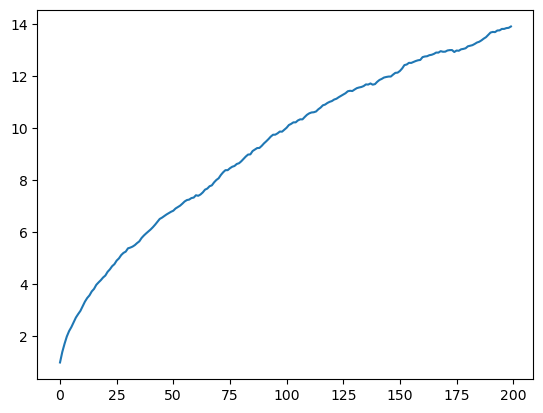

In [17]:
rand_Walker =  np.random.choice([-1,+1],(1000,200))
print(rand_Walker,'\n')
walker_dist = np.cumsum(rand_Walker,axis=1)
print(walker_dist,'\n')
dist_squared = np.square(walker_dist)
mean_squared = np.mean(dist_squared,axis=0)
print(mean_squared,'\n')

%matplotlib inline 
rms_values = np.sqrt(mean_squared)
steps = range(200)
plt.plot(steps,rms_values)
plt.show

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900 30000  4000 48300]
 [ 1901 47200  6100 48200]
 [ 1902 70200  9800 41500]
 [ 1903 77400 35200 38200]
 [ 1904 36300 59400 40600]
 [ 1905 20600 41700 39800]
 [ 1906 18100 19000 38600]
 [ 1907 21400 13000 42300]
 [ 1908 22000  8300 44500]
 [ 1909 25400  9100 42100]
 [ 1910 27100  7400 46000]
 [ 1911 40300  8000 46800]
 [ 1912 57000 12300 43800]
 [ 1913 76600 19500 40900]
 [ 1914 52300 45700 39400]
 [ 1915 19500 51100 39000]
 [ 1916 11200 29700 36700]
 [ 1917  7600 15800 41800]
 [ 1918 14600  9700 43300]
 [ 1919 16200 10100 41300]
 [ 1920 24700  8600 47300]]


<function matplotlib.pyplot.show(close=None, block=None)>

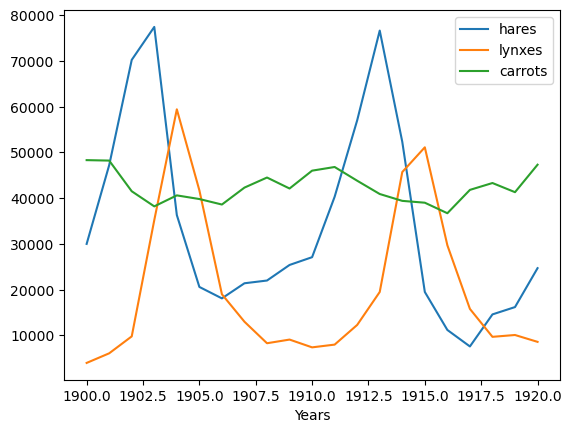

In [19]:
import csv
from io import StringIO
my_data = np.loadtxt("populations.txt",comments='#').astype(int)
print((my_data))
year = my_data[:,0]
#print(year)
hares = my_data[:,1]
lynxes = my_data[:,2]
carrots = my_data[:,3]
plt.plot(year,hares,label='hares')
plt.plot(year,lynxes,label='lynxes')
plt.plot(year,carrots,label='carrots')
plt.xlabel("Years")
plt.legend()
plt.show
